# Title: Regression Analysis

<b>Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:</b>
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns

## Task 1. Pre-process the dataset.

In [2]:
# Load the dataset
uber_data = pd.read_csv("datasets/uber.csv")

# Drop irrelevant columns
uber_data = uber_data.drop(columns=["Unnamed: 0", "key"])

# Handle missing values
uber_data = uber_data.dropna(subset=["dropoff_longitude", "dropoff_latitude"])

# Convert pickup_datetime to datetime to extract features, if required
uber_data.pickup_datetime = pd.to_datetime(uber_data.pickup_datetime)

uber_data = uber_data.assign(hour = uber_data.pickup_datetime.dt.hour,
               day = uber_data.pickup_datetime.dt.day,
               month = uber_data.pickup_datetime.dt.month,
               year = uber_data.pickup_datetime.dt.year,
               dayofweek = uber_data.pickup_datetime.dt.dayofweek)


In [3]:
# Drop original datetime column for simpler processing
uber_data = uber_data.drop(["pickup_datetime"], axis =1)

In [4]:
# Split features and target variable
X = uber_data.drop(columns=['fare_amount'])
y = uber_data['fare_amount']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

## Task 2. Identify outliers.

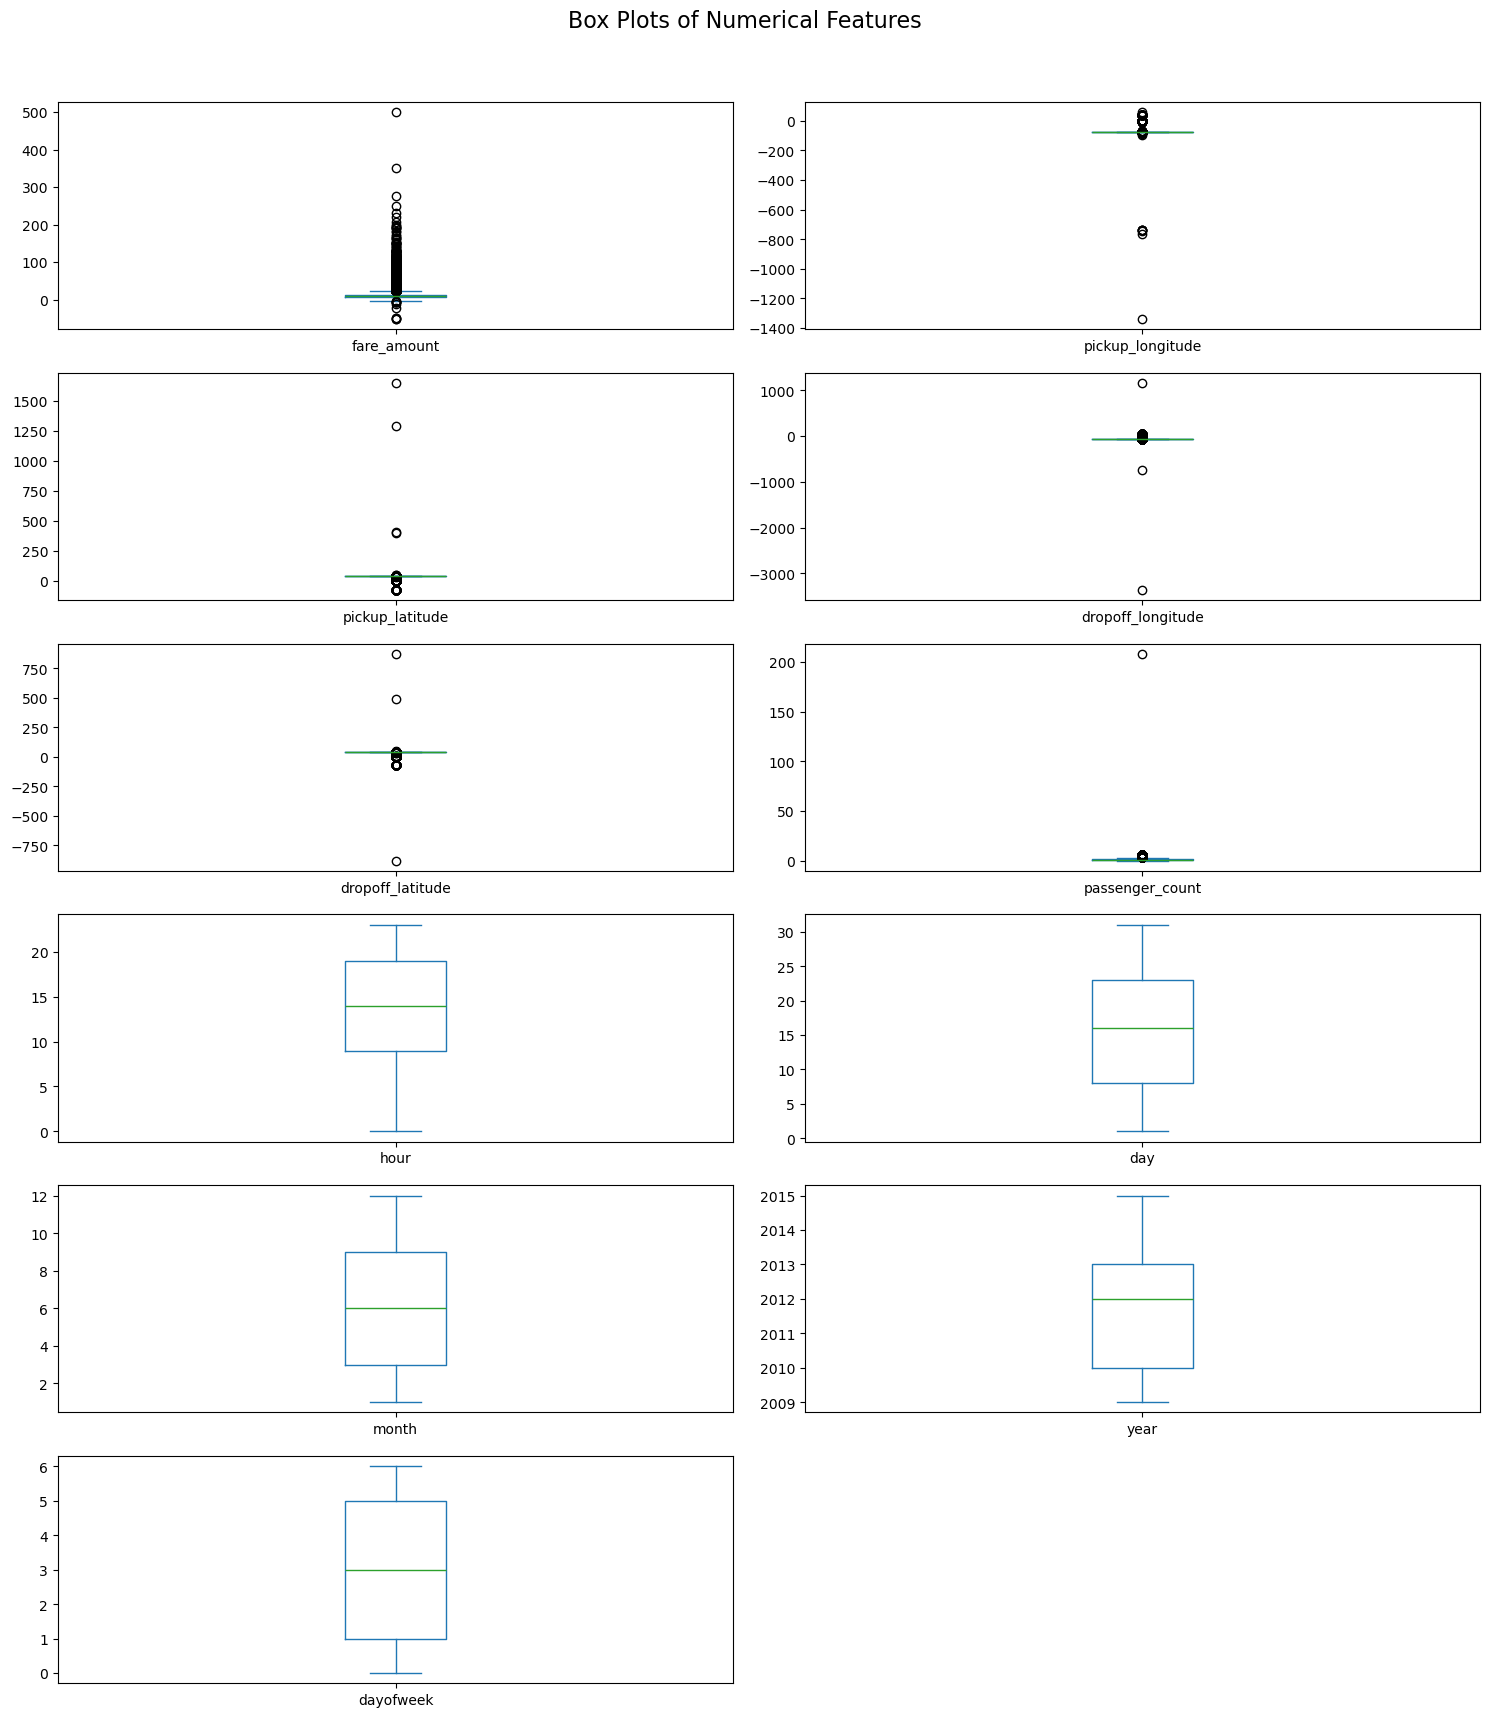

In [5]:
# Plot box plots for each numerical feature in subplots
uber_data.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20), sharex=False, sharey=False)
plt.suptitle("Box Plots of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    uber_data[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(uber_data , c)
    return df1

In [7]:
uber_data = treat_outliers_all(uber_data , uber_data.iloc[: , 0::])

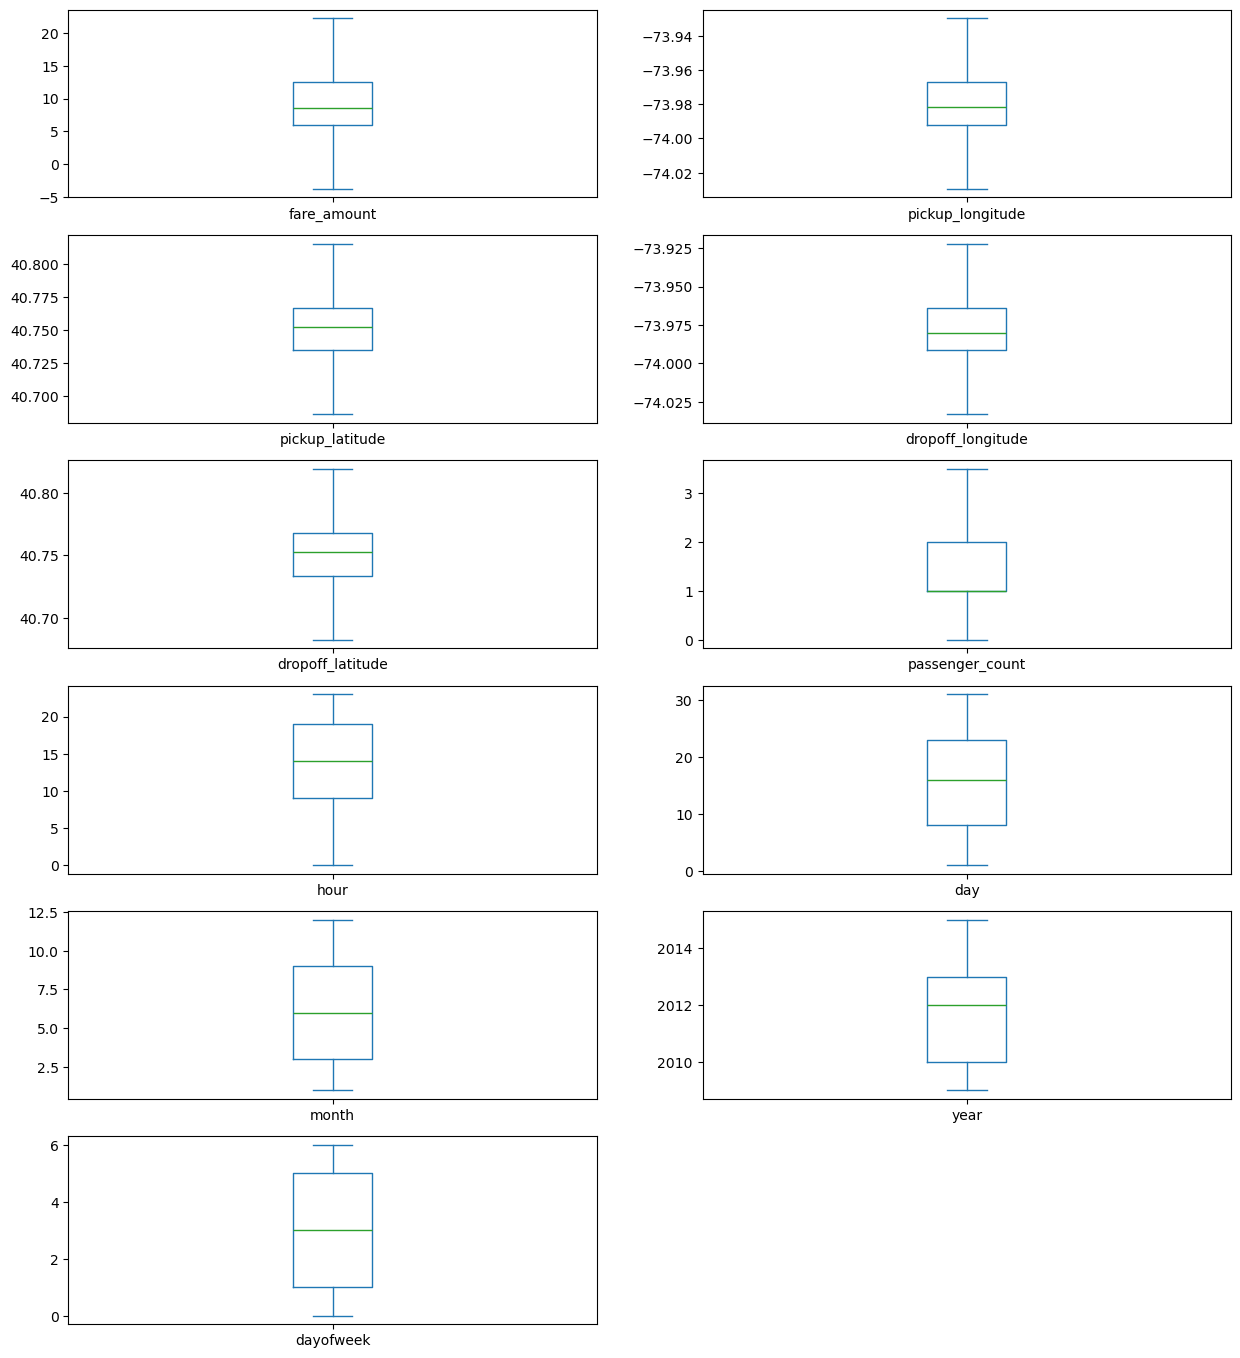

In [8]:
uber_data.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

## Task 3. Check the correlation.

<Axes: >

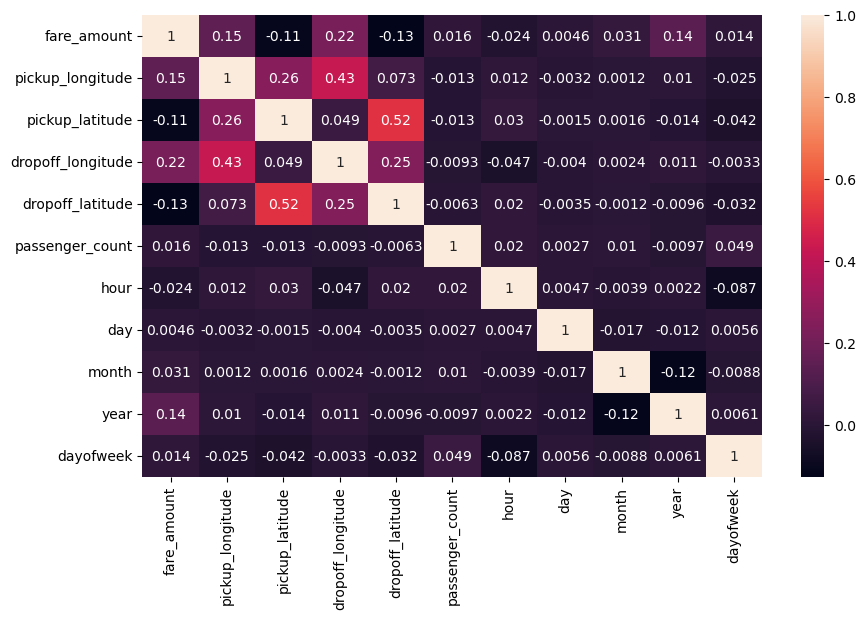

In [9]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(uber_data.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

## Task 4. Implement linear regression and ridge, Lasso regression models.

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Train models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

## Task 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [17]:
# Define a function to calculate evaluation metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return r2, rmse

# Evaluate and compare models
models = {'Linear Regression': lin_reg, 'Ridge Regression': ridge_reg, 'Lasso Regression': lasso_reg}
for model_name, model in models.items():
    r2, rmse = evaluate_model(model, X_test, y_test)
    print(f"{model_name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

Linear Regression - R²: 0.0167, RMSE: 10.1137
Ridge Regression - R²: 0.0167, RMSE: 10.1137
Lasso Regression - R²: 0.0159, RMSE: 10.1179


C:\Users\pravi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pravi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pravi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
